# Lab 6: SIFT

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Load Images

In [2]:
imgs = []
for i in range(1, 6):
    filename = "{}.jpg".format(i)
    img_bgr = cv2.imread('dataset/{}'.format(filename))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    imgs.append(img_rgb.copy())

target_bgr = cv2.imread('target.jpg')
target = cv2.cvtColor(target_bgr, cv2.COLOR_BGR2RGB)

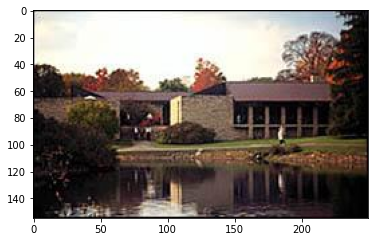

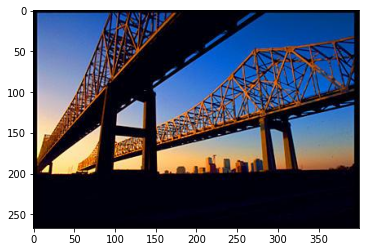

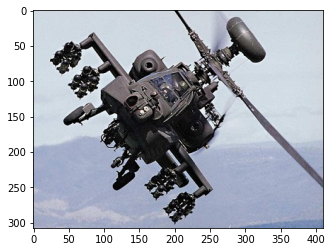

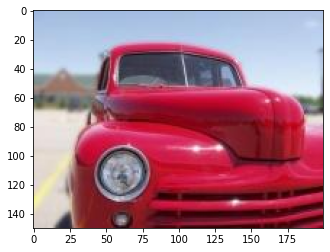

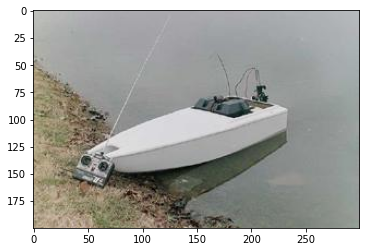

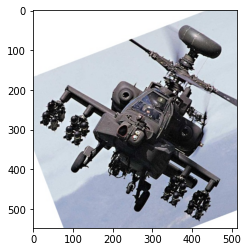

In [3]:
for img in imgs:
    plt.imshow(img)
    plt.show()

plt.imshow(target)
plt.show()

In [4]:
# Images used to test SIFT

img_rgb = imgs[2].copy()
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
target_rgb = target.copy()
target_gray = cv2.cvtColor(target_rgb, cv2.COLOR_RGB2GRAY)

## SIFT in OpenCV

In [5]:
# Detect keypoints using SIFT

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img_gray, None)
kp2, des2 = sift.detectAndCompute(target_gray, None)

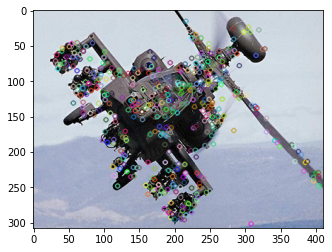

In [6]:
img_sift = img_rgb.copy()
img_sift = cv2.drawKeypoints(img_rgb, kp1, img_sift)

plt.imshow(img_sift)
plt.savefig('sift_keypoints.jpg')
plt.show()

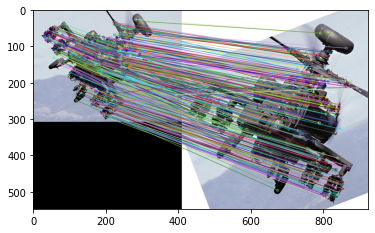

In [7]:
# Feature matching using Brute-Force Matcher

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
matches = cv2.drawMatchesKnn(img_rgb, kp1, target_rgb, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matches)
plt.savefig('sift_matches.jpg')
plt.show()

## "Home brew" SIFT

In [8]:
import sift

kp1, des1 = sift.detectAndCompute(img_gray)
kp2, des2 = sift.detectAndCompute(target_gray)

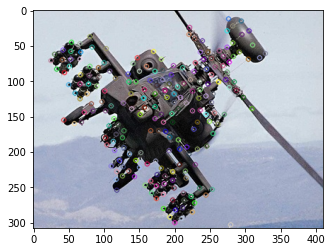

In [9]:
img_sift = img_rgb.copy()
img_sift = cv2.drawKeypoints(img_rgb, kp1, img_sift)

plt.imshow(img_sift)
plt.savefig('sift_keypoints_homebrew.jpg')
plt.show()

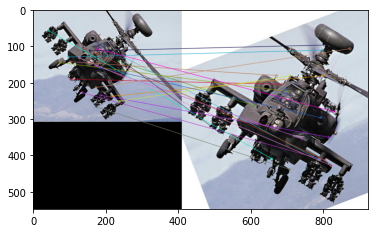

In [10]:
# Feature matching using Brute-Force Matcher

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
matches = cv2.drawMatchesKnn(img_rgb, kp1, target_rgb, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matches)
plt.savefig('sift_matches_homebrew.jpg')
plt.show()